## $\nabla \mathbf{B}$ Drift

#### About the phenomenon

This drift occurs when a particle is moving a non-uniform magnetic field.
During the cyclotron orbit, when a particle moves into a larger magnetic field, the curvature of its orbit becomes tighter, transforming the otherwise circular orbit into a cycloid. 

The drift velocity is: $v_{\nabla B}=\frac{mv_\perp^2}{2}\frac{\mathbf{B}\times \nabla B}{qB^3}$

In [2]:
# get ZPIC 2D
import em2d
import numpy as np

# Time step
dt = 0.02

# Simulation time
tmax = 10.8

# Number of cells
nx  = [64,64]

# Simulation box size
box = [2,2]

## Plasma Slabs

# Particles per cell
ppc = [1,1]

## Negative charge
# Use a slab density profile
dens=em2d.Density( type = "slab", start = 0.95,end=1.05)
# Set up a super low density
dens.n=1e-6
# give it a small velocity to kick of the motion
ufl=0.8
#create the species
electrons = em2d.Species( "electrons", -1, ppc,
                           density = dens,ufl=[ufl,0,0])

## Positive charge
dens2=em2d.Density( type = "slab", start = 0.95,end=1.05)
dens2.n=1e-6
positrons = em2d.Species( "positrons", 1, ppc,
                           density = dens2,ufl=[ufl,0,0])

# Initialize simulation
sim = em2d.Simulation( nx, box, dt, species = (electrons,positrons) )

#External fields
B=0.8
E=0.01
def ext_B(x,y,t):
    return [0,0,B*(4+3*(y-box[1]/2)/box[1])]

def ext_E(x,y,t):
    return [0,0,0]

ex=em2d.Ext_Field(sim,ext_B=ext_B)

#arays to store the particles trajectories
pos_part_rep =[]
ele_part_rep =[]

def itera():
    sim.current.zero()
    #print(sim.emf.B_part[32,:,0])

    species=sim.get_species()
    for spec in species:
        spec.advance(sim)

    sim.current.update()
    sim.emf.advance(sim)
    ex.update_ext(sim)
    sim.advance()
    #store the electron trajectories
    ele_part_rep.append(sim.get_species()[0].particles[150].copy())
    #store the positron(ish) trajectories
    pos_part_rep.append(sim.get_species()[1].particles[149].copy())

    
while sim.t < 2*1.8*np.pi:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    itera()

In [7]:
#convert trajectories to position arrays
e_posx_t=[(i['ix']+i['x'])*box[0]/nx[0] for i in ele_part_rep]
e_posy_t=[(i['iy']+i['y'])*box[1]/nx[1] for i in ele_part_rep]

p_posx_t=[(i['ix']+i['x'])*box[0]/nx[0] for i in pos_part_rep]
p_posy_t=[(i['iy']+i['y'])*box[1]/nx[1] for i in pos_part_rep]

#create time array
t=np.linspace(0,sim.t,sim.n)

In [8]:
gradbd=0.5*0.8*0.8*3*0.8/box[1]/(ext_B(0,(max(e_posy_t)),0)[2])**2   
gradbd2=0.5*0.8*0.8*3*0.8/box[1]/(ext_B(0,(max(p_posy_t)),0)[2])**2   

0.024833246435342644

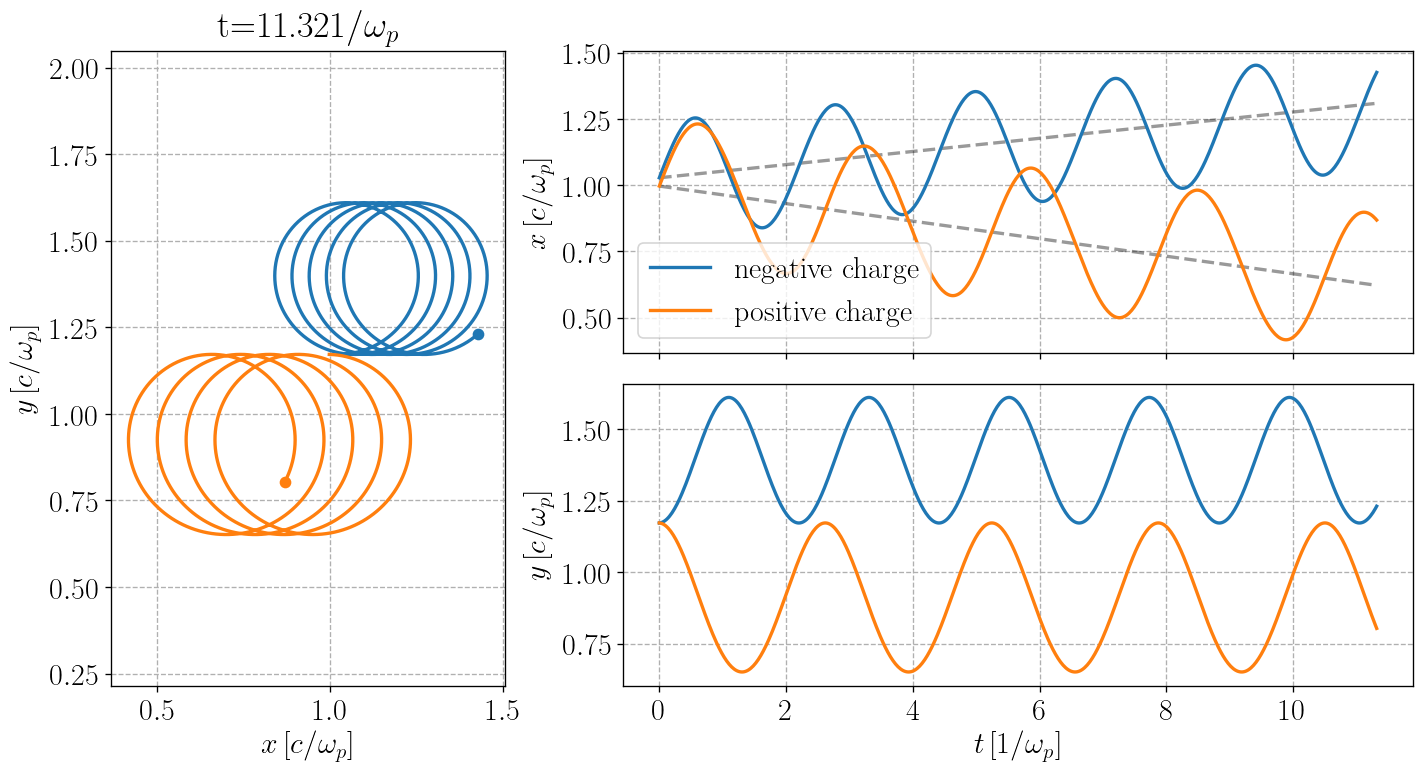

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

#Set up the plot
fig=plt.figure(figsize=(14, 7), dpi=120)
plt.rcParams.update({'font.size': 18})
mpl.rc('text', usetex = 'True')
mpl.rc('font', family = 'serif')
gs2 = gridspec.GridSpec(2, 2, hspace=0.1,width_ratios=[1, 2])

#left part: xy trajectories
ax = plt.subplot(gs2[:, 0])
## negative charge trajectory
ax.plot(e_posx_t,e_posy_t,lw=2)
ax.scatter(e_posx_t[-1],e_posy_t[-1])
## positive charge trajectory
ax.plot(p_posx_t,p_posy_t,lw=2)
ax.scatter(p_posx_t[-1],p_posy_t[-1])

#top right: xt trajectories
ax2 = plt.subplot(gs2[0,1])
ax2.plot(t,gradbd*t+e_posx_t[0],lw=2,c='k',ls='--',alpha=0.4)
ax2.plot(t,-gradbd2*t+p_posx_t[0],lw=2,c='k',ls='--',alpha=0.4)
ax2.plot(t,e_posx_t,lw=2,label="negative charge")
ax2.plot(t,p_posx_t,lw=2,label="positive charge")

#bottom right: yt trajectories
ax3 = plt.subplot(gs2[1,1])
ax3.plot(t,e_posy_t,lw=2)
ax3.plot(t,p_posy_t,lw=2)

##setup labels, grids, and others
ax.grid(True,ls="--")
ax.set_xlabel("$x\,[c/\omega_p]$")
ax.set_ylabel("$y\,[c/\omega_p]$")
ax.set_aspect('equal', 'datalim')
ax.set_title("t={:.2f}$1/\omega_p$".format(sim.t))
ax2.set_xticklabels([])
ax2.grid(True,ls="--")
ax2.set_ylabel("$x\,[c/\omega_p]$")
ax2.legend()
ax3.set_ylabel("$y\,[c/\omega_p]$")
ax3.set_xlabel("$t\,[1/\omega_p]$")
ax3.grid(True,ls="--")
plt.show()

*** 
***

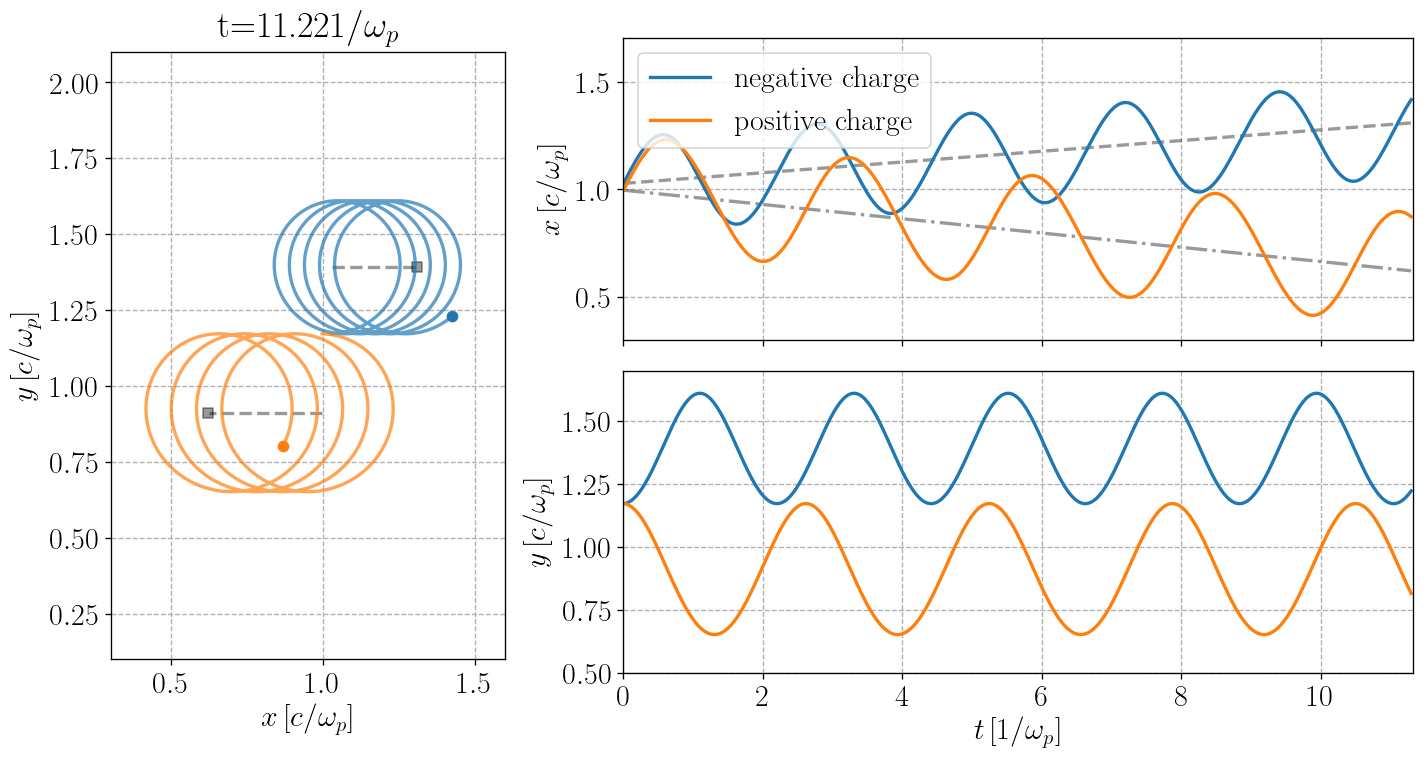

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML

import numpy as np
from matplotlib import pyplot as plt

from matplotlib.animation import FuncAnimation
#fig, axes = plt.subplots(2)

fig=plt.figure(figsize=(14, 7), dpi=120)
plt.rcParams.update({'font.size': 18})
mpl.rc('text', usetex = 'True')
mpl.rc('font', family = 'serif')

gs2 = gridspec.GridSpec(2, 2, hspace=0.1,width_ratios=[1, 2])

ax = plt.subplot(gs2[:, 0],xlim=(0.3,1.6),ylim=(0.1,2.1))
linegg,=ax.plot([],[],lw=2,c="k",ls="--",alpha=0.4)
pointgg=ax.scatter([],[],c="k",alpha=0.4,marker="s")

linegg2,=ax.plot([],[],lw=2,c="k",ls="--",alpha=0.4)
pointgg2=ax.scatter([],[],c="k",alpha=0.4,marker="s")

line1,=ax.plot([],[],lw=2,alpha=0.7,c="C0")
point1=ax.scatter([],[],color="C0")

line2,=ax.plot([],[],lw=2,alpha=0.7,c="C1")
point2=ax.scatter([],[],color="C1")

ax2 = plt.subplot(gs2[0,1],xlim=(0,t[-1]),ylim=(0.3,1.7))
lineg,=ax2.plot([],[],lw=2,c='k',ls='--',alpha=0.4)
lineg2,=ax2.plot([],[],lw=2,c='k',ls='-.',alpha=0.4)
line3,=ax2.plot([],[],lw=2,label="negative charge",c="C0")
line4,=ax2.plot([],[],lw=2,label="positive charge",c="C1")
ax2.legend(loc=2)

ax3 = plt.subplot(gs2[1,1],xlim=(0,t[-1]),ylim=(0.5,1.7))
line5,=ax3.plot([],[],lw=2,c="C0")
line6,=ax3.plot([],[],lw=2,c="C1")


def init():
    line1.set_data([],[])
    return line1,

def animate(i):    
    linegg.set_data(gradbd*t[:i]+e_posx_t[0],np.ones(i)*(max(e_posy_t)+min(e_posy_t))/2)
    linegg2.set_data(-gradbd2*t[:i]+p_posx_t[0],np.ones(i)*(max(p_posy_t)+min(p_posy_t))/2)
    pointgg.set_offsets((gradbd*t[i]+e_posx_t[0],(max(e_posy_t)+min(e_posy_t))/2))
    pointgg2.set_offsets((-gradbd2*t[i]+p_posx_t[0],(max(p_posy_t)+min(p_posy_t))/2))
    
    line1.set_data(e_posx_t[:i],e_posy_t[:i])
    point1.set_offsets((e_posx_t[i],e_posy_t[i]))

    line2.set_data(p_posx_t[:i],p_posy_t[:i])
    point2.set_offsets((p_posx_t[i],p_posy_t[i]))

    ax.grid(True,ls="--")
    ax.set_xlabel("$x\,[c/\omega_p]$")
    ax.set_ylabel("$y\,[c/\omega_p]$")
    ax.set_aspect('equal')
    if(i%10==0):
        ax.set_title("t={:.2f}$1/\omega_p$".format(t[i]))
    lineg.set_data(t[:i],gradbd*t[:i]+e_posx_t[0])
    lineg2.set_data(t[:i],-gradbd2*t[:i]+p_posx_t[0])
    line3.set_data(t[:i],e_posx_t[:i])
    line4.set_data(t[:i],p_posx_t[:i])
    ax2.set_xticklabels([])
    ax2.grid(True,ls="--")
    ax2.set_ylabel("$x\,[c/\omega_p]$")
    
    line5.set_data(t[:i],e_posy_t[:i])
    line6.set_data(t[:i],p_posy_t[:i])
    ax3.set_ylabel("$y\,[c/\omega_p]$")
    ax3.set_xlabel("$t\,[1/\omega_p]$")
    ax3.grid(True,ls="--")
    print(i,"of",len(t),end="\r")
    return line1,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=15, blit=True)

HTML(anim.to_html5_video())

In [8]:
anim.save("gradb.mp4")

ValueError: shape mismatch: objects cannot be broadcast to a single shape